# Friedman $\Large \chi^2$
by Tonatiuh Rangel    
Friedman test for repeated measurements   


## Contents:    
1. [Theory](#theory)   
2. [Numerical example](#example)
3. [Scipy example](#scipy)

<a id='theory'></a>

This is the non-parametric version of the [repeated measures ANOVA](https://github.com/trangel/stats-with-python/blob/master/notebooks/Repeated measures ANOVA.ipynb).    


## Usage
Similarly than repeated measures ANOVA, Friedman $\chi^2$ is used in two kinds of experiments    
1. to analyze changes or consistency among measurements    
2. to analyze differences in mean scores under 3+ different conditions/times  


### Assumptions:
This is a non-parametric test, so there are no assumptions on the shape of distributions.      

### Hypothesis
Null hypothesis   
$\mathcal{H}_0$ : $\mu_1 = \mu_2 = \mu_3 = \dots  = \mu_k$   
for $k$ groups   

Alternative hypothesis   
$\mathcal{H}_1$ :  at least two means are significantly different  

### Test method    


As in other non-parametric methods, we need to replace the data with its ranks:   
    
Steps     

$k = $ number of groups (times or conditions)    
$n = $ number of subjects 

#### Ranks
Given data $\left\{x_{ij}\right\}_{n\times k}$ a matrix of dimension $n \times k$, find the rank matrix $\left\{r_ij\right\}_{n\times k}$ 
where the $r_{ij}$ is the rank of $x_ij$ within block $i$.   


#### Average sum of ranks $\overline{r}$

$\overline{r} = \frac{1}{nk}\sum_{i=1}^n \sum_{j=1}^k r_{ij}$

#### Sum of squares for groups $SS_\textrm{groups}$ 
A group is a time or a condition   

$SS_\textrm{groups} = n \sum_{i=1}^k (\overline{r}_i - \overline{r})^2$


##### Sum of squares error $SS_\textrm{error}$    

$SS_\textrm{error} = \frac{1}{n(k-1)} \sum_{i=1}^N \sum_{j=1}^k (r_{ij} - \bar{r})^2$


#### $Q$-statistic:    
As in other tests, we calculate a $Q$-statistic  

${\displaystyle Q={\frac {SS_\textrm{groups}}{SS_\textrm{error}}}} $. 


The above will become more evindent with the following numerical example    

#### Interpreting the results     
* If $n$ or $k$ is large (i.e. n > 15 or k > 4), the probability distribution of Q can be approximated by that of a chi-squared distribution. In this case the p-value is given by ${\displaystyle \mathbf {P} (\chi _{k-1}^{2}\geq Q)} \mathbf{P}(\chi^2_{k-1} \ge Q)$.     
* If $n$ or $k$ is small, the p-value should be obtained from tables of Q for the Friedman test.


Further reading:
* https://en.wikipedia.org/wiki/Friedman_test

<a id='example'></a>    

## Numerical example    
In this test, let's use a hypothethical example of blood glucose (BG) readings of persons with diabetes (same test used for my notebook on Repeated measures ANOVA).       
The test is done three times, say before, within and after a given clinical treatment and we want to know if there is a significant difference within the groups (times).     

The database is not real but just to be used as a toy example.   
This contains BG readings (in mg/dL) for 40 persons with diabetes at different times.

In [1]:
import pandas as pd
import numpy as np
# This is to print in markdown style
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Read dataset locally:
#df = pd.read_csv('../data/BG-db.csv',index_col=0)


# Read dataset from url:
import io
import requests
url="https://raw.githubusercontent.com/trangel/stats-with-python/master/data/BG-db.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=0)


df.columns=['before','during','after']
df.index.name='Subject'
df.head(10)

,before,during,after
Subject,,,
0,89.162573,94.023517,94.594145
1,90.857629,95.273755,95.040646
2,94.912999,96.612870,95.200472
3,95.254064,96.818673,97.205801
4,97.136291,97.760342,98.428840
5,99.809999,99.169227,98.867769
6,101.094087,99.579283,99.790581
7,101.531428,99.661758,100.669928
8,101.981148,100.812359,101.751155


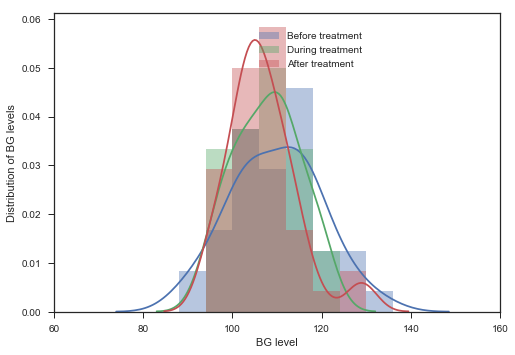

In [2]:
# Let's visualize the data
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")


bins = np.arange(70,150,6)

A = df['before'].values
B = df['during'].values
C = df['after'].values


# Show the results of a linear regression within each dataset
ax1 = sns.distplot(A,bins=bins,label='Before treatment')
ax2 = sns.distplot(B,bins=bins,label='During treatment')
ax3 = sns.distplot(C,bins=bins,label='After treatment')


plt.pyplot.xlabel('BG level')
plt.pyplot.ylabel('Distribution of BG levels')
plt.pyplot.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0.)

plt.pyplot.xlim((60,160))
plt.pyplot.show()

#### Ranks
Given data $\left\{x_{ij}\right\}_{n\times k}$ a matrix of dimension $n \times k$, find the rank matrix $\left\{r_ij\right\}_{n\times k}$ 
where the $r_{ij}$ is the rank of $x_ij$ within block $i$. 

In [3]:
def get_rank(row):
    """This will return the ranks as an array of a given array of numbers.
    Input:
    row, numpy array
    Output
    a numpy array with the ranks of each value in row
    
    Example:
    If row=[40,100,20], this will
    1) order the data 20, 40 , 100, 
    2) assign a rank based on the ordering
    rank = [2,3,1]
    """
    # Sort values
    row_sorted = np.sort(row)
    ranks = []
    jj=0
    for num1 in row:
        jj = jj + 1
        kk = 0
        for num2 in row_sorted:
            kk = kk + 1
            if ( num1 == num2):
                ranks.append(kk)
                continue
    return ranks
        
ranks = df.apply(lambda row: get_rank(row.values),axis=1 )
ranks.columns = ['Rank before', 'Rank during','Rank after']
ranks.head(10)

,Rank before,Rank during,Rank after
Subject,,,
0,1,2,3
1,1,3,2
2,1,3,2
3,1,2,3
4,1,2,3
5,3,2,1
6,3,1,2
7,3,1,2
8,3,1,2


#### Average sum of ranks $\overline{r}$

$\overline{r} = \frac{1}{nk}\sum_{i=1}^n \sum_{j=1}^k r_{ij}$

In [4]:
rbar = ranks.mean().mean()

# Get values for k and n
n = len(ranks)
k = len(ranks.columns)

#### Sum of squares for groups $SS_\textrm{groups}$ 
A group is a time or a condition   

$SS_\textrm{groups} = n \sum_{i=1}^k (\overline{r}_i - \overline{r})^2$


In [5]:
# Compute mean value per column:

SSg = 0.0

rbars = ranks.mean()
for rbar_i in rbars:
    diff_squared = (rbar_i - rbar)**2
    SSg= SSg + diff_squared
SSg = SSg * n

printmd("$SS_{{groups}}$ = {}".format(round(SSg,3)))

$SS_{groups}$ = 36.6

##### Sum of squares error $SS_\textrm{error}$    

$SS_\textrm{error} = \frac{1}{n(k-1)} \sum_{i=1}^N \sum_{j=1}^k (r_{ij} - \bar{r})^2$


In [6]:
SSe = 0.0

for row in ranks.values:
    for rank in row:
        diff_squared = (rank - rbar)**2
        SSe = SSe + diff_squared
SSe = SSe / float(n*(k-1))

printmd("$SS_{{error}}$ = {}".format(round(SSe,3)))

$SS_{error}$ = 1.0

#### $Q$-statistic:    
As in other tests, we calculate a $Q$-statistic  

${\displaystyle Q={\frac {SS_\textrm{groups}}{SS_\textrm{error}}}} $. 

In [7]:
Qstatistic = (SSg/SSe)
printmd('$n = {}, k = {}$'.format(n,k))
printmd('$Q$-statistic $= {}$'.format(round(Qstatistic,3)))


$n = 40, k = 3$

$Q$-statistic $= 36.6$

In [8]:
from scipy.stats import chi2

# As explained above, the Q distribution can be approximation by a chi2 distribution,
# for k=2, as in this case, one should look at the value at Q tables for Friedman distribution.
# We omit this step for simplicity here.

DF=k-1
pvalue = 1-chi2.cdf(Qstatistic,DF)
printmd('P-value $= {}$'.format(pvalue))

P-value $= 1.1282646483756764e-08$

<a id='scipy'></a>    

## Scipy example    
Let's use now the scipy implementation of the above

In [9]:
from scipy import stats
measure1 = df['before'].values
measure2 = df['during'].values
measure3 = df['after'].values
stats.friedmanchisquare(measure1,measure2,measure3)

FriedmanchisquareResult(statistic=36.600000000000023, pvalue=1.128264649549649e-08)

In this case, the pvalue is virtually zero, and hence we can safetly reject our null hypothesis. i.e., there are significant differences among the measures.    

Note that this conclusion is in agreement with that of my notebook on Repeated measures ANOVA.    